# Exploration der Word2vec Embeddings 10

- ohne Bigramme
- vector_size: 400
- window: 3
- min_count: 2
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('trained_models/Word2Vec10', '10w2v11.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1985', '1986-2000', '2001-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')
essere0 = compare_cos(periods, models, 'essere', 'molto')
avere0 = compare_cos(periods, models, 'avere', 'molto')

In [8]:
spesso0

{'1700-1750': 0.31051087379455566,
 '1751-1800': 0.4153159558773041,
 '1801-1825': 0.5013230443000793,
 '1826-1850': 0.5390037298202515,
 '1851-1875': 0.40733030438423157,
 '1876-1900': 0.4440222978591919,
 '1901-1925': 0.4517539441585541,
 '1926-1950': 0.4103009104728699,
 '1951-1985': 0.3091358244419098,
 '1986-2000': 0.45002737641334534,
 '2001-2021': 0.48622092604637146}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0, essere0, avere0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

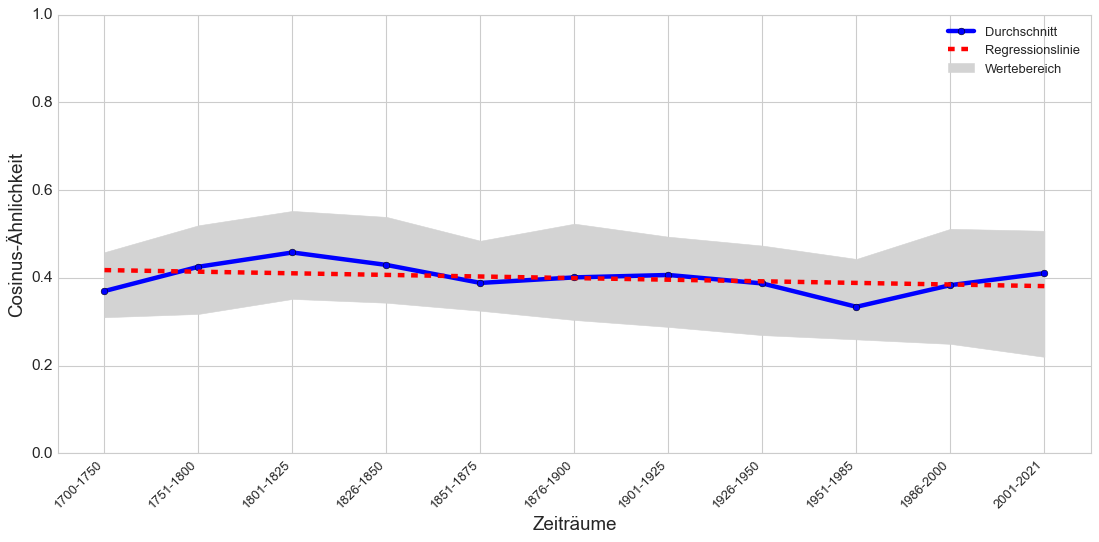

In [15]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [16]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

#domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])
domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [17]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [18]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [19]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [20]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [21]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [22]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

In [23]:
# essere 

essere1 = compare_cos(periods, models, 'essere', 'angoscia')
essere2 = compare_cos(periods, models, 'essere', 'atterrire')
essere3 = compare_cos(periods, models, 'essere', 'panico')
essere4 = compare_cos(periods, models, 'essere', 'paura')
essere5 = compare_cos(periods, models, 'essere', 'raccapricciare')
essere6 = compare_cos(periods, models, 'essere', 'schifo')
essere7 = compare_cos(periods, models, 'essere', 'sgomentare')
essere8 = compare_cos(periods, models, 'essere', 'sgomento')
essere9 = compare_cos(periods, models, 'essere', 'spaventare')
essere10 = compare_cos(periods, models, 'essere', 'spavento')
essere11 = compare_cos(periods, models, 'essere', 'terrore')

#essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])
essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])

# Durchschnitt pro Zeitraum
essere_mean = dict(essere_df.mean())

# min pro Zeitraum
essere_min = dict(essere_df.min())
essere_min_list = [float(x) for x in list(essere_min.values())]

#max pro Zeitraum 
essere_max = dict(essere_df.max())
essere_max_list = [float(x) for x in list(essere_max.values())]

In [24]:
# avere 

avere1 = compare_cos(periods, models, 'avere', 'angoscia')
avere2 = compare_cos(periods, models, 'avere', 'atterrire')
avere3 = compare_cos(periods, models, 'avere', 'panico')
avere4 = compare_cos(periods, models, 'avere', 'paura')
avere5 = compare_cos(periods, models, 'avere', 'raccapricciare')
avere6 = compare_cos(periods, models, 'avere', 'schifo')
avere7 = compare_cos(periods, models, 'avere', 'sgomentare')
avere8 = compare_cos(periods, models, 'avere', 'sgomento')
avere9 = compare_cos(periods, models, 'avere', 'spaventare')
avere10 = compare_cos(periods, models, 'avere', 'spavento')
avere11 = compare_cos(periods, models, 'avere', 'terrore')

#avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])
avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])

# Durchschnitt pro Zeitraum
avere_mean = dict(avere_df.mean())

# min pro Zeitraum
avere_min = dict(avere_df.min())
avere_min_list = [float(x) for x in list(avere_min.values())]

#max pro Zeitraum 
avere_max = dict(avere_df.max())
avere_max_list = [float(x) for x in list(avere_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [25]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, 
                                spesso_mean, essere_mean, avere_mean])
control_mean = dict(control_mean_df.mean())

In [26]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, 
                               spesso_min, essere_min, avere_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [27]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, 
                               spesso_max, essere_max, avere_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

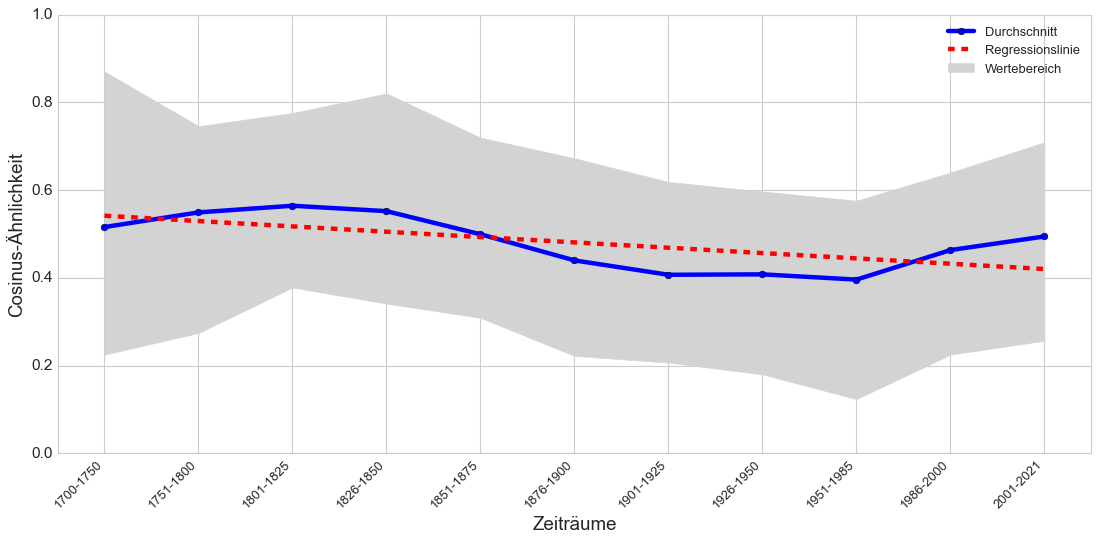

In [28]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [29]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(solecito, 0.986790657043457)","(dellordinario, 0.9874371290206909)","(ragunare, 0.982157289981842)","(profferta, 0.9672008156776428)","(stolto, 0.9433155655860901)","(calunnia, 0.9242969751358032)","(straziare, 0.8802717328071594)","(patire, 0.8850754499435425)","(amfortas, 0.9312793016433716)","(atroce, 0.9098977446556091)","(preda, 0.9382123947143555)"
1,"(minorato, 0.9854140877723694)","(andavasi, 0.9871809482574463)","(ghiaja, 0.9812124967575073)","(vincer, 0.9617742896080017)","(viltà, 0.9354516267776489)","(persecuzione, 0.9201672673225403)","(onta, 0.8696411848068237)","(represso, 0.8834702968597412)","(disperatamente, 0.9205141067504883)","(gelosia, 0.8911450505256653)","(crudele, 0.9157742261886597)"
2,"(coltivargli, 0.9849371910095215)","(pezzenti, 0.9869188666343689)","(iared, 0.9812021255493164)","(inimicare, 0.9580996632575989)","(tradito, 0.9346676468849182)","(rota, 0.9076240658760071)","(cagion, 0.861312210559845)","(sgridare, 0.8829159736633301)","(stomaco, 0.9157707095146179)","(crudele, 0.8910399675369263)","(mutilare, 0.9063383340835571)"
3,"(seguìta, 0.9847618937492371)","(mummolo, 0.986799418926239)","(febbricciuole, 0.9808372855186462)","(abbandonar, 0.9568675756454468)","(straziare, 0.9341033101081848)","(immunità, 0.9071539044380188)","(rassegnazione, 0.8605284094810486)","(straziare, 0.8774768114089966)","(fiora, 0.915370523929596)","(odiare, 0.889981746673584)","(orribilmente, 0.9025095105171204)"
4,"(ceduto, 0.9844290614128113)","(alcibiade, 0.9864756464958191)","(sbari, 0.9806531667709351)","(vergognarsi, 0.9565334916114807)","(schiettezza, 0.9339016079902649)","(fratellanza, 0.9053325057029724)","(materno, 0.8598378896713257)","(insulto, 0.8748568296432495)","(gioire, 0.9141613245010376)","(follia, 0.8882225155830383)","(seminare, 0.9004688262939453)"
5,"(lasciato, 0.9842349886894226)","(assentire, 0.9864299297332764)","(trojana, 0.9803392291069031)","(vivea, 0.9560145735740662)","(fervore, 0.9333165884017944)","(abnegazione, 0.9044579267501831)","(espiare, 0.8586462140083313)","(avidità, 0.8748264908790588)","(inorridire, 0.9131680130958557)","(sete, 0.8806096911430359)","(atroce, 0.8969378471374512)"
6,"(aquilae, 0.9841831922531128)","(soprallodate, 0.9859870672225952)","(tanai, 0.9803212285041809)","(incrudelire, 0.9558600783348083)","(torturare, 0.9319978952407837)","(divorzio, 0.9026933312416077)","(vergogna, 0.8566763997077942)","(gioire, 0.8742384314537048)","(scemare, 0.9127786159515381)","(ossessione, 0.8780478239059448)","(schiena, 0.8933815360069275)"
7,"(accattare, 0.9841175079345703)","(trattabile, 0.9855716228485107)","(crollar, 0.9803085327148438)","(divisamenti, 0.9557217955589294)","(irritato, 0.9290059804916382)","(concittadino, 0.9017413258552551)","(martirio, 0.8549008965492249)","(mentire, 0.8707275986671448)","(terrorizzare, 0.912441074848175)","(orrore, 0.8761453628540039)","(spavento, 0.8921189904212952)"
8,"(latrocinij, 0.9841070771217346)","(wilton, 0.9854905009269714)","(scotere, 0.9802265167236328)","(spergiuro, 0.9549611210823059)","(codardo, 0.9287248253822327)","(giurisdizionale, 0.9011214971542358)","(povertà, 0.8529502749443054)","(poverina, 0.8681754469871521)","(alfio, 0.911776065826416)","(innocente, 0.8733581900596619)","(sgomento, 0.8900717496871948)"
9,"(addolorati, 0.9840583801269531)","(ingorgamenti, 0.9854839444160461)","(moleste, 0.9802062511444092)","(disonesto, 0.9548502564430237)","(doppiamente, 0.9284074306488037)","(fors, 0.8990309238433838)","(compianto, 0.8517658710479736)","(tormentare, 0.8667662739753723)","(mariola, 0.91097092628479)","(sublime, 0.8726886510848999)","(orrendamente, 0.8879724144935608)"


In [30]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.46784043312072754,
 '1751-1800': 0.5610155463218689,
 '1801-1825': 0.5064077973365784,
 '1826-1850': 0.49385666847229004,
 '1851-1875': 0.5087845921516418,
 '1876-1900': 0.5246482491493225,
 '1901-1925': 0.433976411819458,
 '1926-1950': 0.4011397063732147,
 '1951-1985': 0.40156254172325134,
 '1986-2000': 0.441895991563797,
 '2001-2021': 0.4191286861896515}

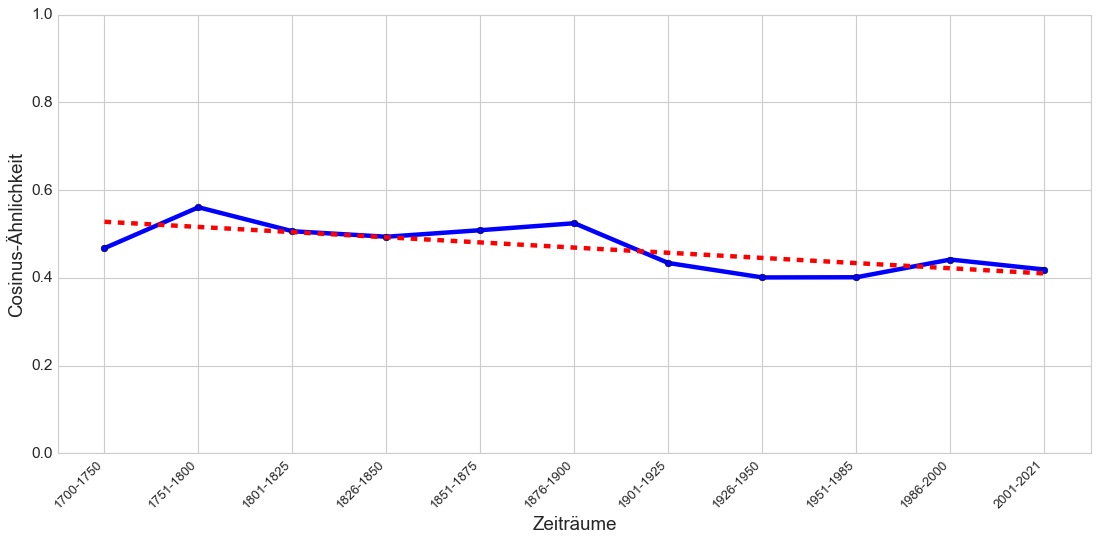

In [31]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

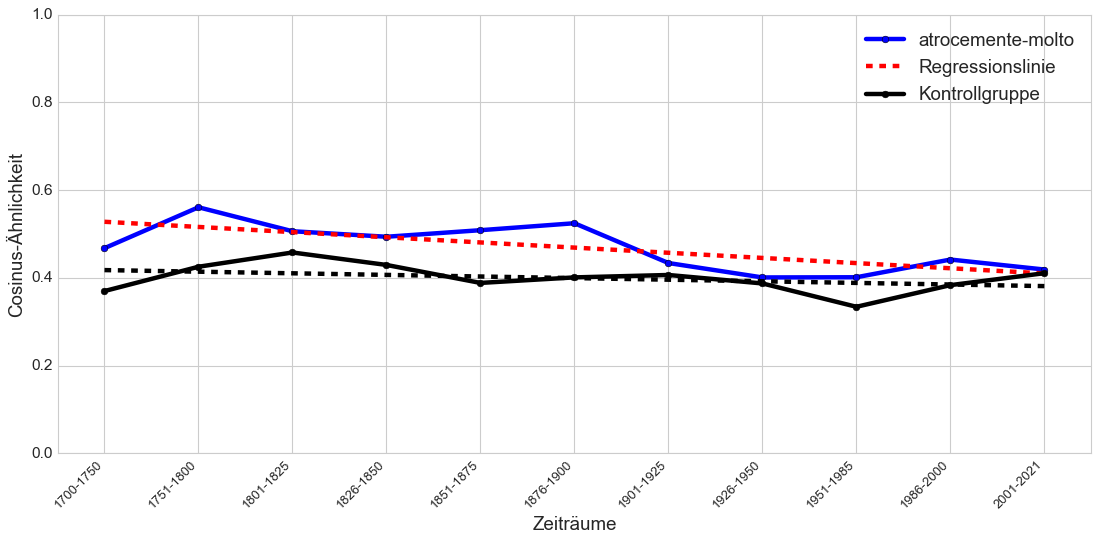

In [32]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [33]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [34]:
atrocemente1

{'1700-1750': 0.8469244241714478,
 '1751-1800': 0.7207507491111755,
 '1801-1825': 0.7026302814483643,
 '1826-1850': 0.7650131583213806,
 '1851-1875': 0.761630654335022,
 '1876-1900': 0.6468049883842468,
 '1901-1925': 0.6708551049232483,
 '1926-1950': 0.6837618350982666,
 '1951-1985': 0.6723496317863464,
 '1986-2000': 0.791611909866333,
 '2001-2021': 0.8400437831878662}

In [35]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

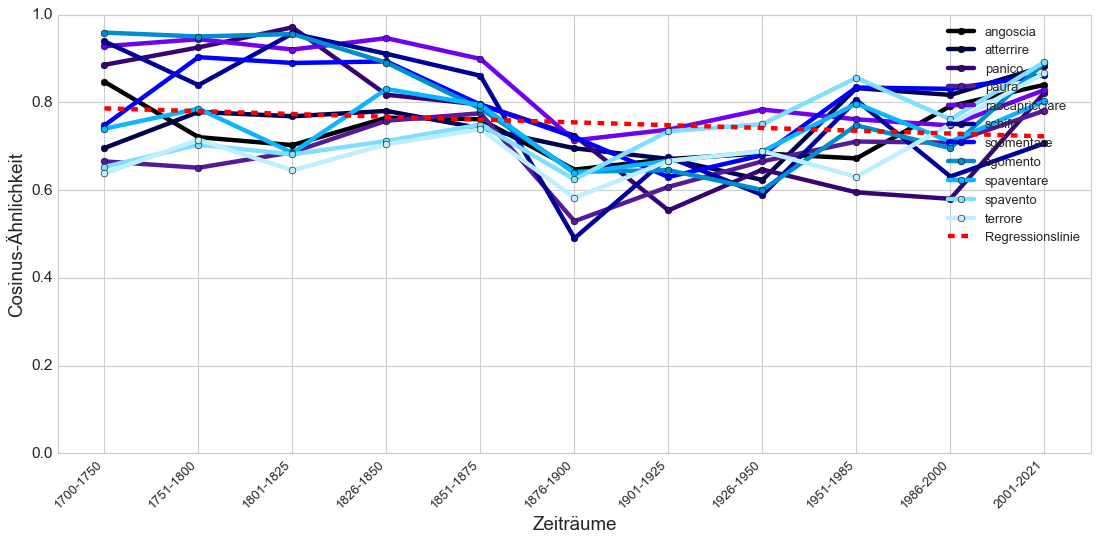

In [36]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

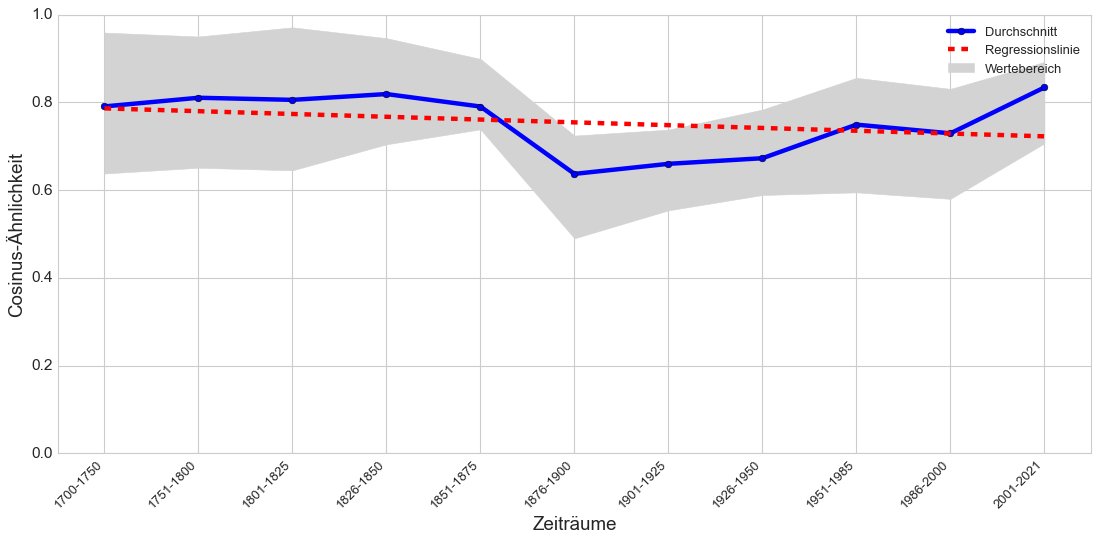

In [37]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

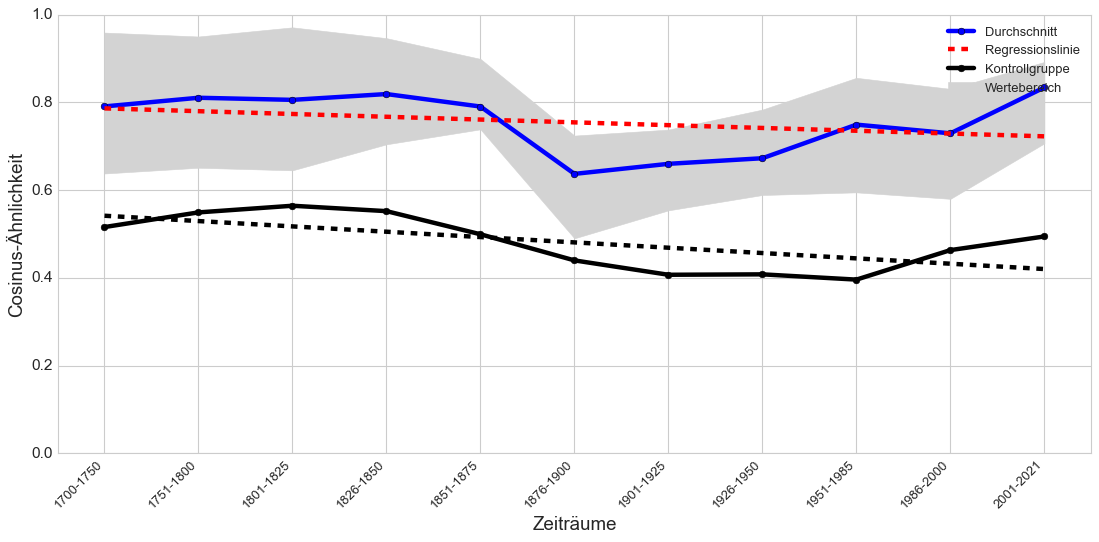

In [38]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [39]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(disusare, 0.9839552640914917)",not in vocab,"(giapeto, 0.9899374842643738)",not in vocab,"(timidezza, 0.9729501008987427)","(sitibonda, 0.9845550060272217)","(lavorio, 0.9284312725067139)","(stravolto, 0.9092278480529785)","(geometria, 0.9585105180740356)","(spaventosamente, 0.9076697826385498)","(tremendamente, 0.9100525975227356)"
1,"(denti, 0.9833491444587708)",not in vocab,"(bionda, 0.9888758659362793)",not in vocab,"(esaltamento, 0.9716168642044067)","(turbazioni, 0.9837128520011902)","(significazione, 0.926663339138031)","(sciolto, 0.9063835740089417)","(espediente, 0.9527249932289124)","(pianta, 0.8779509663581848)","(terribilmente, 0.8936330676078796)"
2,"(rammenter, 0.9829565286636353)",not in vocab,"(falco, 0.9888556599617004)",not in vocab,"(ripugnanze, 0.9713788628578186)","(immaginativa, 0.9818273186683655)","(sprigionare, 0.925493597984314)","(madido, 0.9050408601760864)","(nebuloso, 0.9504950642585754)","(infinitamente, 0.8763468861579895)","(raffinato, 0.8826854825019836)"
3,"(connesso, 0.9828319549560547)",not in vocab,"(cypra, 0.9887658953666687)",not in vocab,"(permaloso, 0.970610499382019)","(intuitivo, 0.9815611839294434)","(istantaneo, 0.9252758622169495)","(cadaverico, 0.9028246998786926)","(labile, 0.9492802619934082)","(leggenda, 0.8748994469642639)","(crudo, 0.879152238368988)"
4,"(primitivo, 0.9823095798492432)",not in vocab,"(horatius, 0.988682210445404)",not in vocab,"(essendovi, 0.9705616235733032)","(trafitture, 0.9812160730361938)","(sensualità, 0.9250932931900024)","(pallidissimo, 0.9013221859931946)","(idealità, 0.9487481713294983)","(pigro, 0.8724551200866699)","(assai, 0.8790706396102905)"
5,"(impaurito, 0.982151210308075)",not in vocab,"(porporino, 0.9886525869369507)",not in vocab,"(bisbetico, 0.9705068469047546)","(crudezza, 0.9809229373931885)","(mutevole, 0.9235513806343079)","(sanguinante, 0.8999636769294739)","(edonistico, 0.9487186074256897)","(infantile, 0.871942400932312)","(puro, 0.8780776262283325)"
6,"(studenti, 0.9821410179138184)",not in vocab,"(marra, 0.9885280728340149)",not in vocab,"(tantalo, 0.9697481393814087)","(rigidità, 0.9803767204284668)","(sensibilità, 0.9226851463317871)","(meticcie, 0.8994674682617188)","(informe, 0.948151171207428)","(insopportabile, 0.8713487386703491)","(metafora, 0.8763960003852844)"
7,"(conquisto, 0.9818882942199707)",not in vocab,"(lxx, 0.9884095191955566)",not in vocab,"(penetrazione, 0.9694365859031677)","(ebrietà, 0.9798469543457031)","(affinare, 0.9220256805419922)","(gracile, 0.8994470238685608)","(distintamente, 0.947712242603302)","(farsa, 0.8692597150802612)","(pelle, 0.8743356466293335)"
8,"(papismo, 0.9817134737968445)",not in vocab,"(espero, 0.9883488416671753)",not in vocab,"(sel, 0.9693835377693176)","(inesplorato, 0.9797812104225159)","(tensione, 0.9212195873260498)","(visetto, 0.8981423377990723)","(stilizzazione, 0.9476115107536316)","(noioso, 0.8659093379974365)","(sfumatura, 0.8739836812019348)"
9,"(trasfigurare, 0.9814809560775757)",not in vocab,"(compens, 0.9882160425186157)",not in vocab,"(presago, 0.9692585468292236)","(chiaroscuri, 0.9794930219650269)","(psiche, 0.9197992086410522)","(strofinare, 0.897306501865387)","(bachiana, 0.9472454786300659)","(luminoso, 0.8649305701255798)","(trama, 0.8709467053413391)"


In [40]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.45647332072257996,
 '1801-1825': 0.43165329098701477,
 '1851-1875': 0.5392470955848694,
 '1876-1900': 0.4812176823616028,
 '1901-1925': 0.5023494958877563,
 '1926-1950': 0.5113620758056641,
 '1951-1985': 0.5749170780181885,
 '1986-2000': 0.581305205821991,
 '2001-2021': 0.6049060821533203}

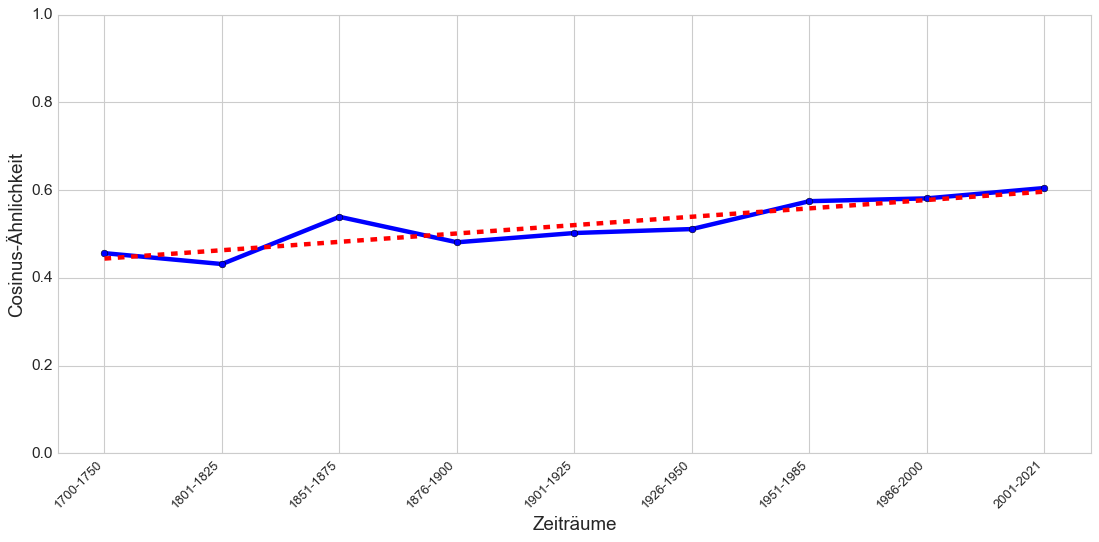

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [42]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [43]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

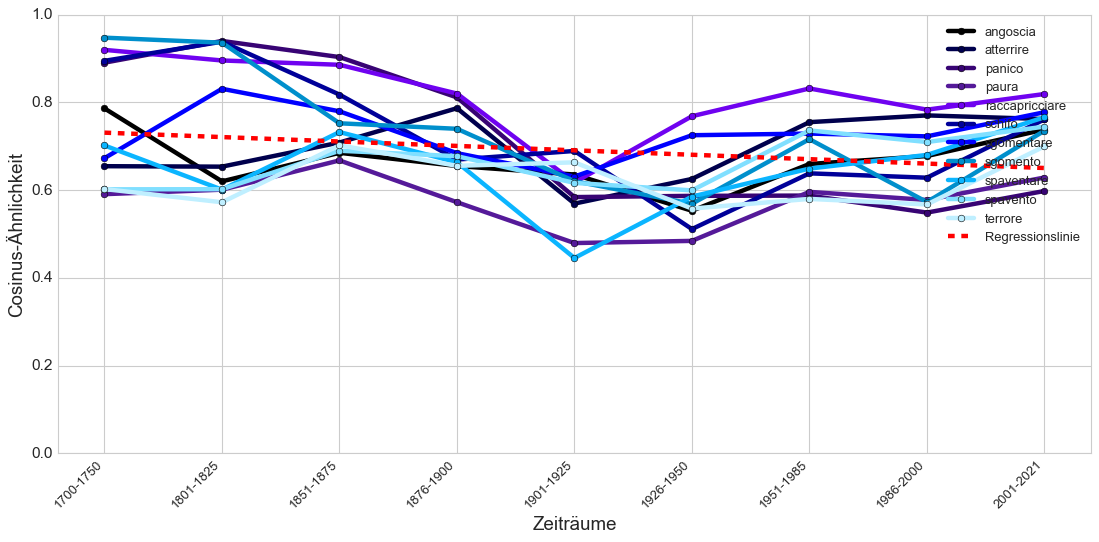

In [44]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

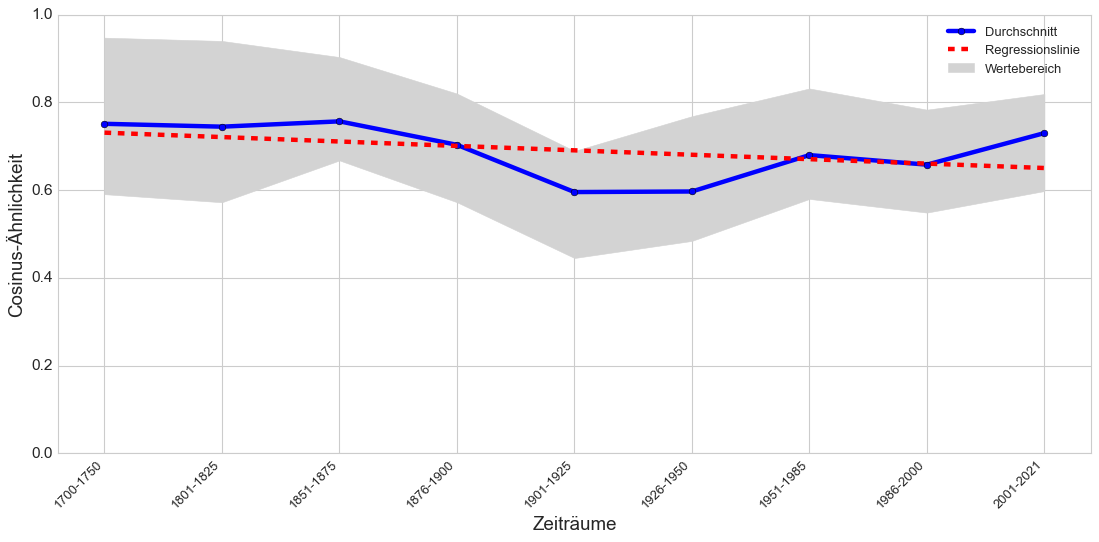

In [45]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [46]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,not in vocab,not in vocab,"(straccio, 0.982699453830719)","(spezz, 0.9866781830787659)","(diafano, 0.9786289930343628)","(accigliato, 0.9260634183883667)","(cranio, 0.9396584630012512)","(appesantire, 0.9274809956550598)","(straziato, 0.9566197991371155)","(mutilare, 0.9484900236129761)","(orribilmente, 0.9365864396095276)"
1,not in vocab,not in vocab,"(scorrenti, 0.9750961661338806)","(forsennate, 0.984456479549408)","(soffuso, 0.9752093553543091)","(arsura, 0.9230138659477234)","(grondare, 0.9322473406791687)","(mansueto, 0.9253554940223694)","(quindicenne, 0.9559516310691833)","(proiettile, 0.8938777446746826)","(mutilare, 0.9229503273963928)"
2,not in vocab,not in vocab,"(riverenti, 0.9742603898048401)","(stringea, 0.983768880367279)","(bianchezza, 0.9748520851135254)","(ghiacciato, 0.9226616621017456)","(fulminato, 0.9317110180854797)","(arruffare, 0.9244872331619263)","(bisticciare, 0.9520187377929688)","(sfigurato, 0.8936731815338135)","(atrocemente, 0.8879724144935608)"
3,not in vocab,not in vocab,"(languenti, 0.9737541079521179)","(festante, 0.983364999294281)","(fosforescente, 0.9738494157791138)","(sbiancare, 0.9198951125144958)","(brancicare, 0.9307863712310791)","(cinereo, 0.9215605854988098)","(panciana, 0.9519191384315491)","(orribilmente, 0.8894534111022949)","(giacere, 0.8794809579849243)"
4,not in vocab,not in vocab,"(ebe, 0.9736447334289551)","(svégliati, 0.9832804799079895)","(scintillante, 0.9733631610870361)","(umidità, 0.9196081161499023)","(fracassare, 0.9284416437149048)","(esangue, 0.9200272560119629)","(generalone, 0.9498950839042664)","(cadavere, 0.8854572772979736)","(preda, 0.8691860437393188)"
5,not in vocab,not in vocab,"(arcoli, 0.9735643267631531)","(dorgani, 0.983039140701294)","(tinto, 0.9732155799865723)","(gengiva, 0.9187246561050415)","(fiotto, 0.9253119826316833)","(prolisso, 0.9198248982429504)","(ismaelita, 0.9493464231491089)","(sfigurare, 0.8839661478996277)","(killer, 0.8662295937538147)"
6,not in vocab,not in vocab,"(empiea, 0.973444402217865)","(ispaventose, 0.9828680157661438)","(luccicanti, 0.9730866551399231)","(appiccicare, 0.9183853268623352)","(grondante, 0.9250972270965576)","(intridere, 0.9187168478965759)","(maritate, 0.9477972388267517)","(dilaniare, 0.8825961351394653)","(avvolgere, 0.8587867617607117)"
7,not in vocab,not in vocab,"(discoperse, 0.9733114242553711)","(golgota, 0.9827977418899536)","(ombreggiare, 0.9728915095329285)","(scolorite, 0.9182853698730469)","(arrossare, 0.9249802231788635)","(brividi, 0.9186446666717529)","(narraboth, 0.9476764798164368)","(calibro, 0.8727729320526123)","(crudele, 0.8549184203147888)"
8,not in vocab,not in vocab,"(balcone, 0.9730361104011536)","(umilt, 0.9823514819145203)","(aggrottate, 0.9728891253471375)","(arrossare, 0.917898416519165)","(rovente, 0.9239010214805603)","(radi, 0.9184504151344299)","(affittuario, 0.947330117225647)","(ferire, 0.8723153471946716)","(pianto, 0.8537065386772156)"
9,not in vocab,not in vocab,"(rivolve, 0.9729723930358887)","(discolpare, 0.9821890592575073)","(dilatate, 0.9727063775062561)","(estenuata, 0.9173240065574646)","(madido, 0.9238801002502441)","(torturante, 0.9169923663139343)","(sgattaiolare, 0.9470714926719666)","(massacrare, 0.8643348217010498)","(odore, 0.8530072569847107)"


In [47]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1801-1825': 0.49228018522262573,
 '1826-1850': 0.428194522857666,
 '1851-1875': 0.38988423347473145,
 '1876-1900': 0.46564173698425293,
 '1901-1925': 0.37104910612106323,
 '1926-1950': 0.40299659967422485,
 '1951-1985': 0.3869685232639313,
 '1986-2000': 0.26469582319259644,
 '2001-2021': 0.3746124804019928}

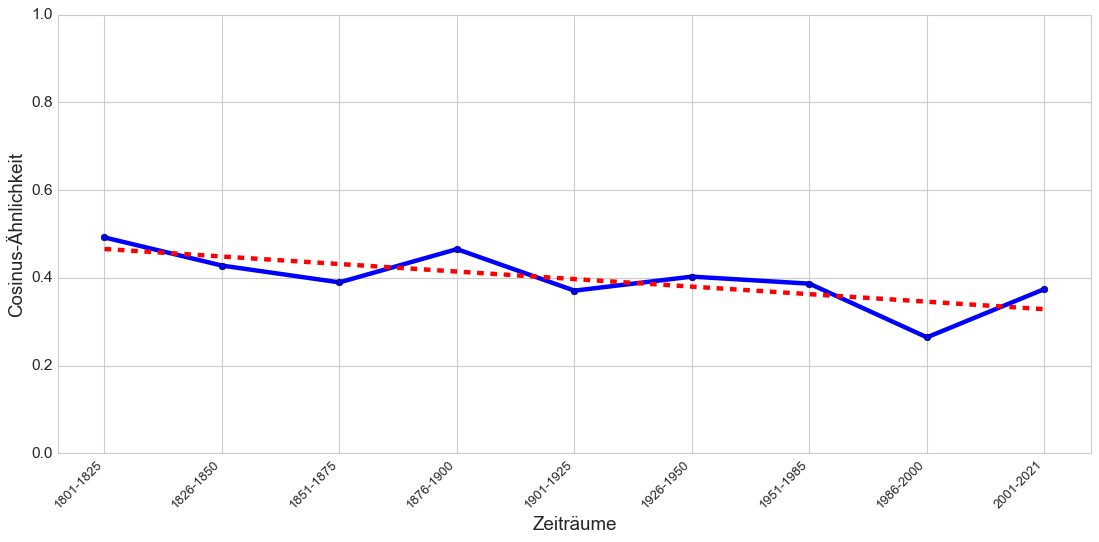

In [48]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [49]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [50]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

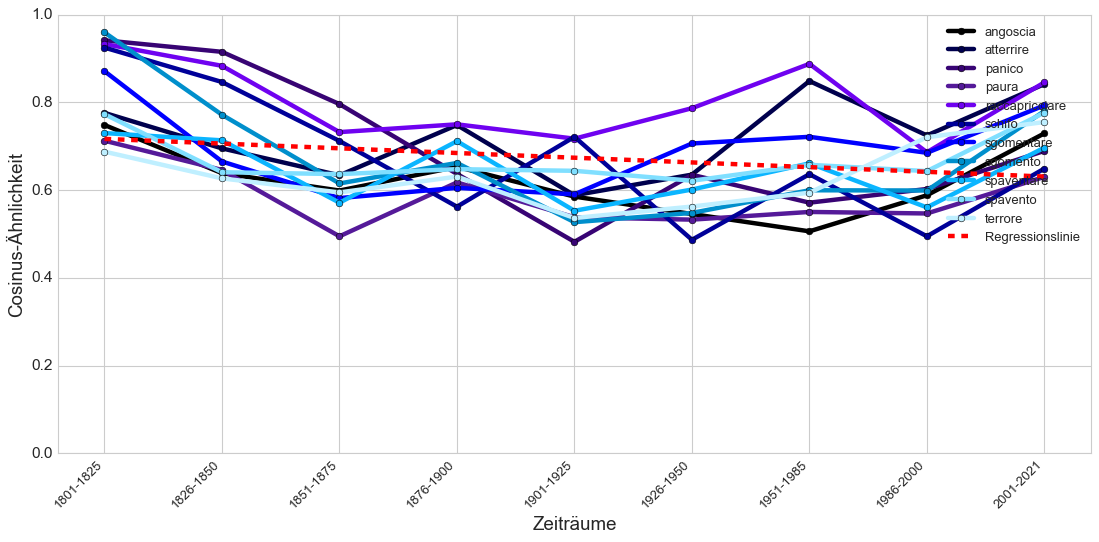

In [51]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

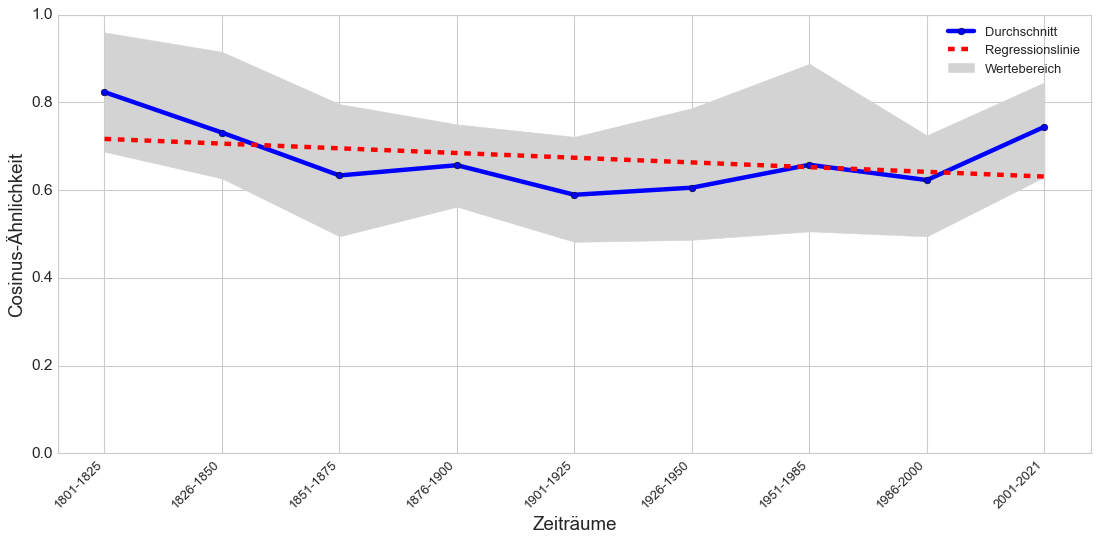

In [52]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [53]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(fremea, 0.9366574287414551)","(semivivo, 0.9616809487342834)","(orlo, 0.9364049434661865)","(scoglio, 0.9461326003074646)","(livido, 0.9203246831893921)","(contorcere, 0.8148956894874573)","(orrendamente, 0.8162033557891846)","(impassibile, 0.801540732383728)","(pozza, 0.8959037661552429)","(mutilare, 0.9335070252418518)","(mutilare, 0.9401373863220215)"
1,"(schiere, 0.9343870878219604)","(vessillo, 0.9604972004890442)","(sudor, 0.9328843951225281)","(leggermente, 0.9360803961753845)","(pallore, 0.915744960308075)","(membra, 0.8145852088928223)","(smunto, 0.814157247543335)","(tenero, 0.8005207777023315)","(grembo, 0.8911205530166626)","(atroce, 0.9010825753211975)","(orrendamente, 0.9365863800048828)"
2,"(fulminar, 0.9337142705917358)","(atra, 0.956782341003418)","(sospeso, 0.929195761680603)","(schiena, 0.9347023367881775)","(guancie, 0.9091572761535645)","(digrignare, 0.8117454648017883)","(livido, 0.8003885746002197)","(gatto, 0.7987114191055298)","(cenere, 0.8863237500190735)","(sfigurato, 0.9003797173500061)","(giacere, 0.9060136079788208)"
3,"(sultan, 0.9324687123298645)","(cinto, 0.9520708918571472)","(orribil, 0.9287075996398926)","(orlo, 0.9322881102561951)","(palpebra, 0.9026913046836853)","(arteria, 0.8115252256393433)","(almea, 0.7970074415206909)","(creatura, 0.7984002828598022)","(agonizzare, 0.8840414881706238)","(sfigurare, 0.8996020555496216)","(atrocemente, 0.9025096297264099)"
4,"(aquilonar, 0.9314982891082764)","(pregni, 0.951715886592865)","(esalare, 0.9286162257194519)","(velocemente, 0.930559515953064)","(umido, 0.8965670466423035)","(contrazione, 0.8083903193473816)","(dilaniare, 0.7968175411224365)","(sorridente, 0.795837938785553)","(straziare, 0.8828689455986023)","(pallottola, 0.89680016040802)","(preda, 0.9019328355789185)"
5,"(corse, 0.9312355518341064)","(turbo, 0.9513508677482605)","(inorridire, 0.9284515976905823)","(traversare, 0.9297898411750793)","(pupilla, 0.8964117169380188)","(pulsare, 0.8051515221595764)","(testina, 0.796557605266571)","(sofferente, 0.7863944172859192)","(succhiare, 0.8817917704582214)","(infernale, 0.8966276049613953)","(cloo, 0.8993048667907715)"
6,"(insanguinata, 0.9296327829360962)","(eburneo, 0.950440526008606)","(urli, 0.9282515048980713)","(ripido, 0.9283127784729004)","(gonfiare, 0.8874863386154175)","(smunto, 0.8036995530128479)","(spaventosamente, 0.7921958565711975)","(feroce, 0.7850812077522278)","(pecora, 0.8814791440963745)","(orrendamente, 0.8894534707069397)","(killer, 0.8987369537353516)"
7,"(ostil, 0.9285673499107361)","(procelloso, 0.9495754837989807)","(lugubre, 0.928013265132904)","(lido, 0.9281826019287109)","(gota, 0.8857050538063049)","(diso, 0.799877941608429)","(cranio, 0.7898580431938171)","(gracile, 0.7848765254020691)","(assembrare, 0.8814435601234436)","(dilaniare, 0.886489987373352)","(atterrire, 0.8972840309143066)"
8,"(corcira, 0.9283267855644226)","(troncato, 0.9492983818054199)","(solco, 0.9251427054405212)","(gruppo, 0.9275540709495544)","(asciugare, 0.8831800818443298)","(convulsamente, 0.7990856170654297)","(viscere, 0.7891659736633301)","(bambina, 0.7836313843727112)","(pigiama, 0.8809981346130371)","(straziare, 0.8850023746490479)","(pianto, 0.8951485753059387)"
9,"(stridi, 0.9280409216880798)","(immoto, 0.948974609375)","(primiero, 0.9246187806129456)","(merli, 0.9275410175323486)","(convulso, 0.8828369975090027)","(corrugare, 0.7977181673049927)","(gracile, 0.7874590754508972)","(vile, 0.7810884714126587)","(affamato, 0.8794311881065369)","(prostituta, 0.8835325837135315)","(diuz, 0.8950647711753845)"


In [54]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.4068198502063751,
 '1751-1800': 0.4086754322052002,
 '1801-1825': 0.4915470778942108,
 '1826-1850': 0.4086124897003174,
 '1851-1875': 0.29909780621528625,
 '1876-1900': 0.3956739902496338,
 '1901-1925': 0.37800925970077515,
 '1926-1950': 0.44598692655563354,
 '1951-1985': 0.3841536343097687,
 '1986-2000': 0.4141034781932831,
 '2001-2021': 0.3825176954269409}

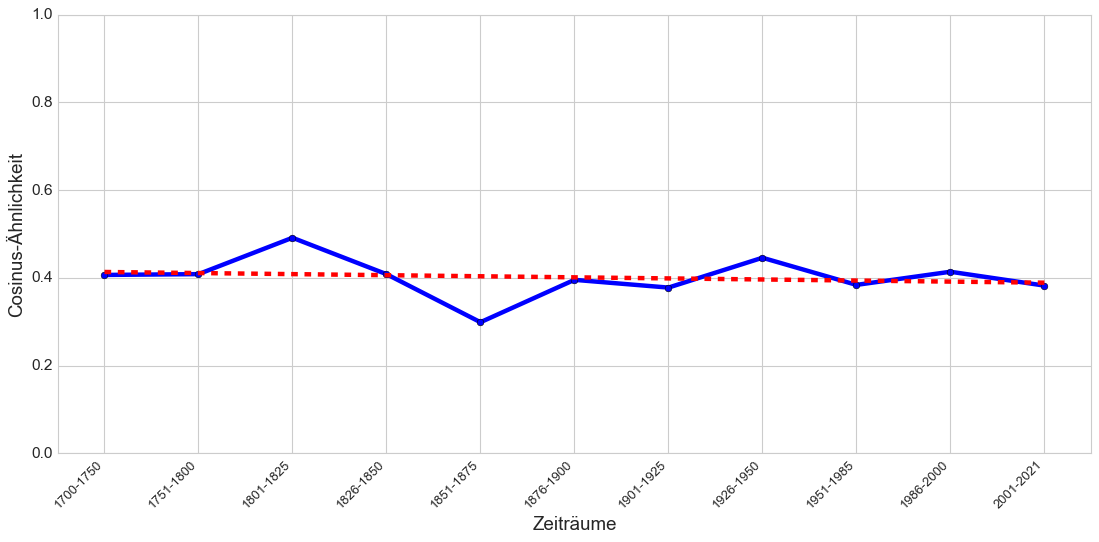

In [55]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [56]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [57]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

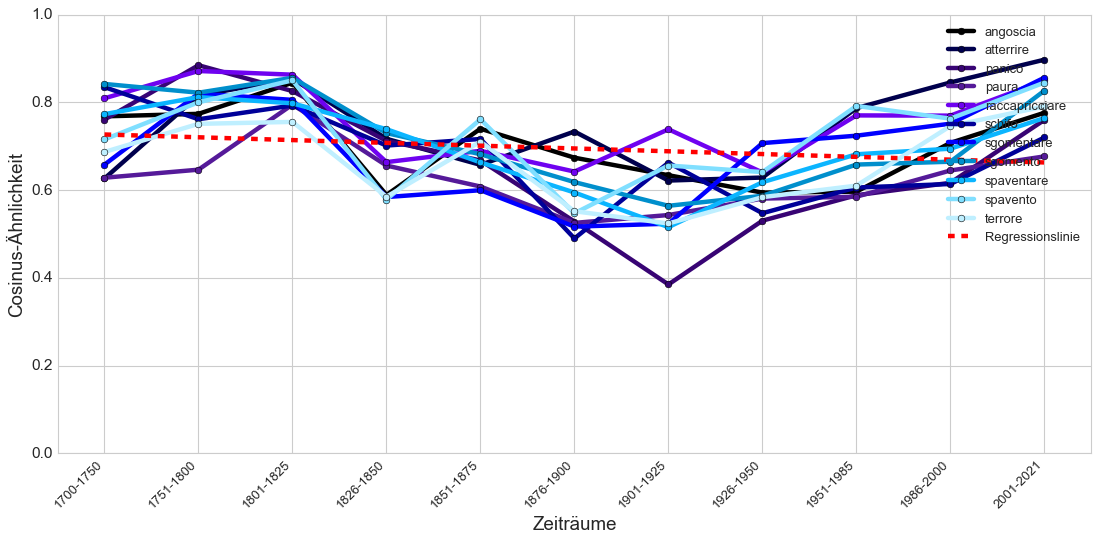

In [58]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

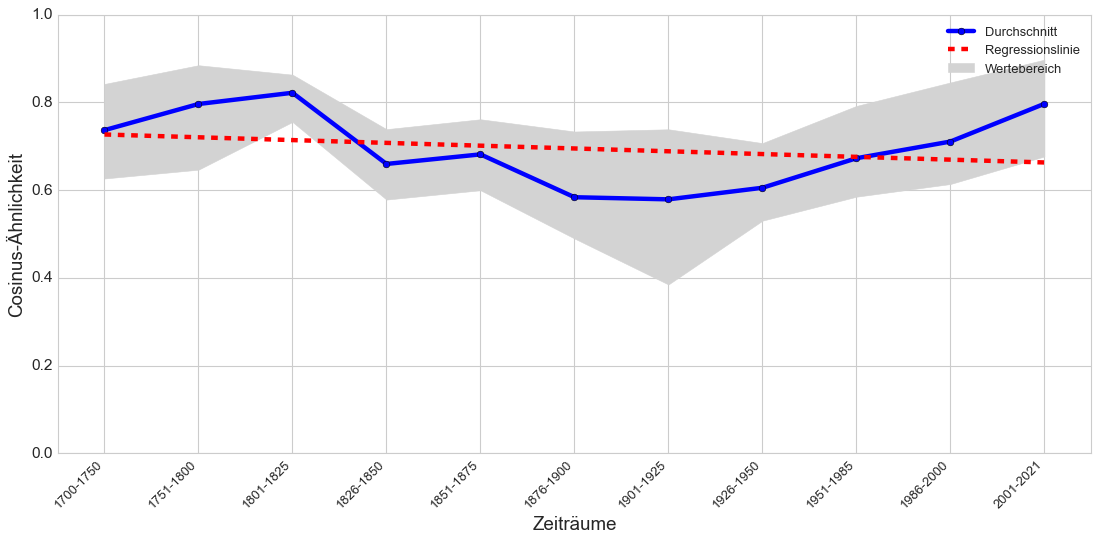

In [59]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [60]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(sacrilega, 0.9583535194396973)",not in vocab,"(cozzavan, 0.9929584860801697)","(comecch, 0.9911673069000244)","(abbrucia, 0.9791719317436218)","(perennemente, 0.9529580473899841)","(muscolo, 0.8700447082519531)","(carezzare, 0.8705319762229919)","(taciturno, 0.8977056741714478)","(mostruosamente, 0.9076698422431946)","(tremendamente, 0.9052563905715942)"
1,"(psammetico, 0.9530590772628784)",not in vocab,"(asfalto, 0.992019772529602)","(gangi, 0.9905368685722351)","(divampare, 0.978958249092102)","(splende, 0.9525474905967712)","(martellare, 0.8541065454483032)","(palpebra, 0.8664661049842834)","(fanciullezza, 0.8968864679336548)","(intensità, 0.890712559223175)","(assai, 0.8972980380058289)"
2,"(frjus, 0.9521979689598083)",not in vocab,"(tegoli, 0.9918797016143799)","(baj, 0.9902130961418152)","(digerita, 0.9775060415267944)","(irrigidire, 0.9524933695793152)","(dilatare, 0.8537386655807495)","(smorto, 0.8651123642921448)","(adolescente, 0.8951556086540222)","(depressione, 0.8901503086090088)","(talmente, 0.885054886341095)"
3,"(approd, 0.9514193534851074)",not in vocab,"(feritrice, 0.9917788505554199)","(sollazzevoli, 0.9901100993156433)","(pugnalare, 0.9772812724113464)","(voluttuosamente, 0.9507357478141785)","(gonfiare, 0.8454372882843018)","(pupilla, 0.8635835647583008)","(sperduto, 0.89145827293396)","(insopportabile, 0.887447714805603)","(puro, 0.8811784386634827)"
4,"(islum, 0.9513015151023865)",not in vocab,"(saporoso, 0.9916409254074097)","(vituperosa, 0.9899002313613892)","(squittire, 0.9768238663673401)","(giuntura, 0.9493675231933594)","(polmone, 0.8427138328552246)","(pallore, 0.8585091233253479)","(fibra, 0.8907456994056702)","(vistoso, 0.8780272603034973)","(lento, 0.8787257075309753)"
5,"(accostatosi, 0.9512100219726562)",not in vocab,"(bicchieri, 0.9913280010223389)","(pietosamente, 0.9898977875709534)","(sospettar, 0.9760253429412842)","(caldura, 0.9487269520759583)","(pulsare, 0.8411340117454529)","(gonna, 0.8556693196296692)","(patire, 0.8885151743888855)","(profondità, 0.8719102740287781)","(terribilmente, 0.8786397576332092)"
6,"(cades, 0.9505548477172852)",not in vocab,"(innalzan, 0.9908750057220459)","(duolsi, 0.9898130297660828)","(accentuato, 0.9759431481361389)","(invaso, 0.9487068057060242)","(tempia, 0.8387738466262817)","(tremito, 0.851080596446991)","(peccatore, 0.8800610303878784)","(sprofondare, 0.8675590753555298)","(depressione, 0.8775191307067871)"
7,"(antibo, 0.9501568078994751)",not in vocab,"(innosservati, 0.9908232688903809)","(apposi, 0.9897763133049011)","(attizzare, 0.9752939343452454)","(addensare, 0.9486026167869568)","(pàlpebre, 0.835191011428833)","(occhietto, 0.8510412573814392)","(ciclismo, 0.8782877922058105)","(leggero, 0.8665303587913513)","(estremamente, 0.876929759979248)"
8,"(plenilunio, 0.9500037431716919)",not in vocab,"(rostrate, 0.9906615018844604)","(incontinente, 0.9897430539131165)","(scappafatica, 0.9752840399742126)","(fluttuare, 0.9478839635848999)","(ruggiva, 0.8348957896232605)","(occhione, 0.8504456281661987)","(sofisticato, 0.8763266801834106)","(lento, 0.8657616376876831)","(comprensibile, 0.8765231370925903)"
9,"(indiani, 0.9496058821678162)",not in vocab,"(musco, 0.9906373023986816)","(darti, 0.9897425770759583)","(restandone, 0.9744658470153809)","(accecandolo, 0.9478113651275635)","(viscere, 0.8334267735481262)","(contorcere, 0.85025954246521)","(fattezza, 0.876079797744751)","(magro, 0.8647155165672302)","(taglia, 0.8759656548500061)"


In [61]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.43979957699775696,
 '1801-1825': 0.4334784150123596,
 '1826-1850': 0.5325918197631836,
 '1851-1875': 0.47485464811325073,
 '1876-1900': 0.41915467381477356,
 '1901-1925': 0.3615248203277588,
 '1926-1950': 0.39938196539878845,
 '1951-1985': 0.5602527856826782,
 '1986-2000': 0.6186752319335938,
 '2001-2021': 0.6331477761268616}

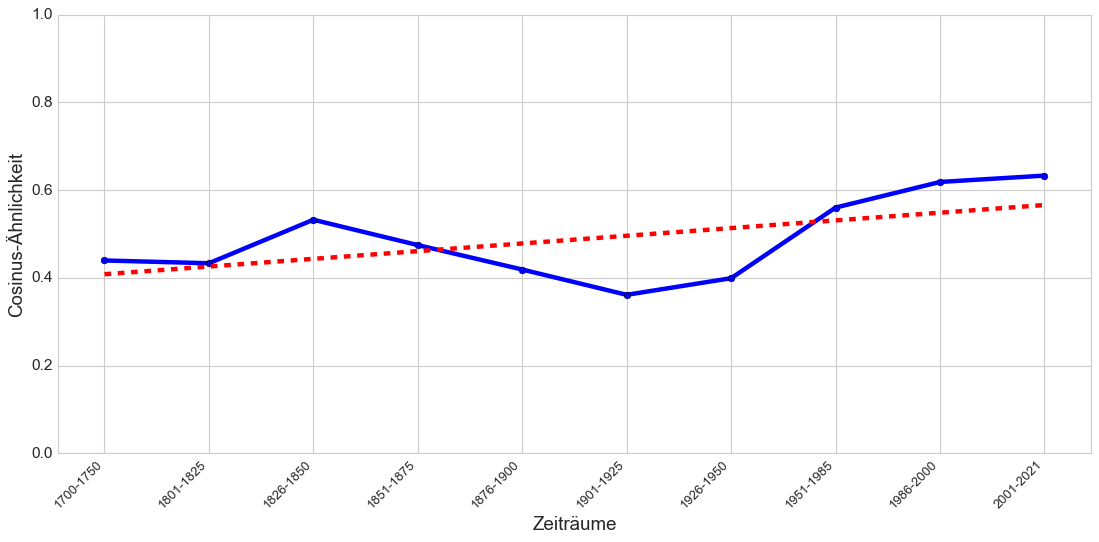

In [62]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [63]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [64]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

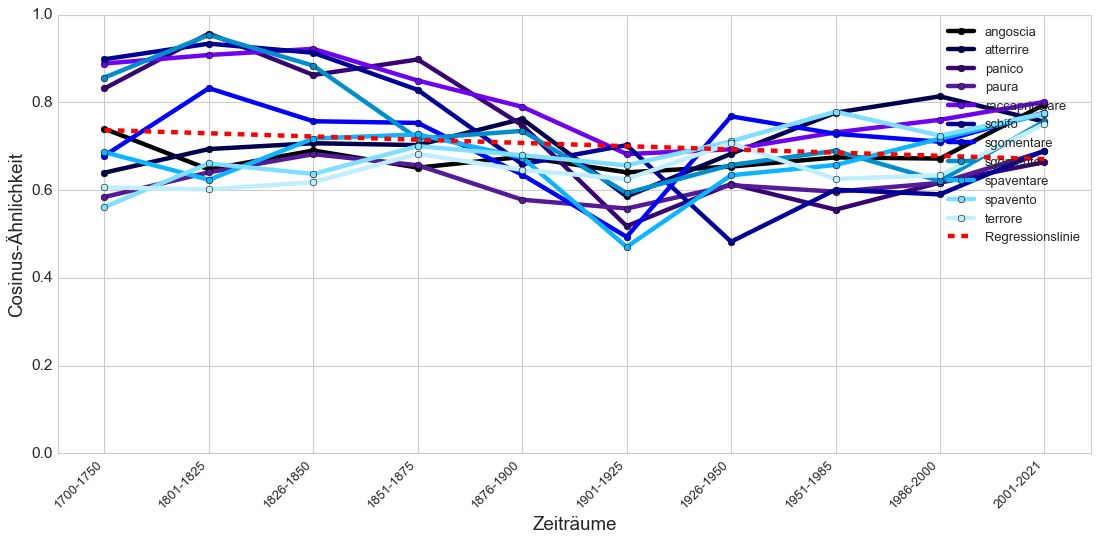

In [65]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

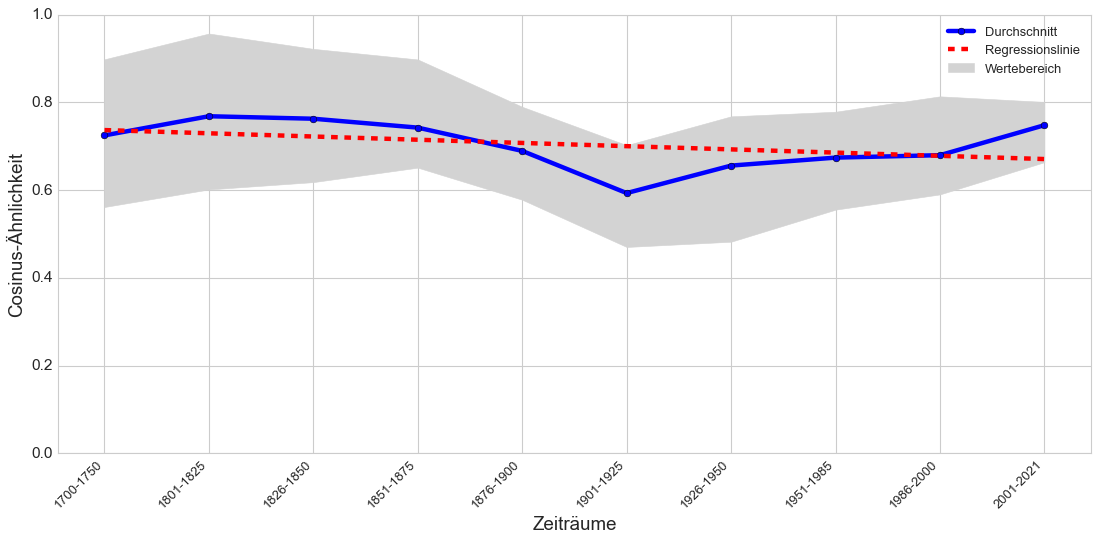

In [66]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [67]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(terni, 0.9648796916007996)","(brevi, 0.9485998153686523)","(irrevocabile, 0.968170166015625)","(bastone, 0.9417909979820251)","(brusco, 0.9013189673423767)","(tremendamente, 0.8914614915847778)","(eppur, 0.8146640062332153)","(gelosia, 0.8084898591041565)","(neppur, 0.8759741187095642)","(tremendamente, 0.9405543208122253)","(tremendamente, 0.9353801608085632)"
1,"(ostiglia, 0.9641552567481995)","(altoum, 0.9465661644935608)","(impenetrabile, 0.9675756692886353)","(furibondo, 0.9412980675697327)","(turbato, 0.8959850668907166)","(contrazione, 0.8849995732307434)","(stranamente, 0.8118133544921875)","(crudele, 0.7872787714004517)","(alquanto, 0.8678203821182251)","(talmente, 0.8962400555610657)","(angosciante, 0.9319987893104553)"
2,"(lautrech, 0.9639075994491577)","(telefo, 0.9464902877807617)","(comportarlo, 0.9633744955062866)","(percossa, 0.9358636736869812)","(affannoso, 0.8945192694664001)","(febbricitante, 0.8812545537948608)","(fiero, 0.8091254234313965)","(pietoso, 0.7761738896369934)","(vergognare, 0.8625366687774658)","(insopportabile, 0.8814712166786194)","(confondere, 0.9252582788467407)"
3,"(scarseggiar, 0.963277280330658)","(fissa, 0.9453705549240112)","(ricomporre, 0.9615241289138794)","(rattenere, 0.933975338935852)","(dolorosamente, 0.8928182721138)","(sardonico, 0.8803442120552063)","(sofferente, 0.8080152869224548)","(tremendamente, 0.7748646140098572)","(stupido, 0.8612177968025208)","(noioso, 0.880460262298584)","(lucido, 0.9189375638961792)"
4,"(polesine, 0.9630114436149597)","(divorzio, 0.9436476826667786)","(malefico, 0.9614129066467285)","(lordo, 0.9332243204116821)","(confuso, 0.8926620483398438)","(sconvolto, 0.8784071803092957)","(plebeo, 0.8011172413825989)","(ingenuo, 0.7691335678100586)","(talmente, 0.8595421314239502)","(confuso, 0.8779929876327515)","(ironia, 0.9181045889854431)"
5,"(serravalle, 0.9623860120773315)","(vedi, 0.9423014521598816)","(colorire, 0.9606842398643494)","(stocco, 0.9323306679725647)","(spaventevole, 0.8919944167137146)","(orrendamente, 0.8779270052909851)","(dignitoso, 0.7981966733932495)","(orribilmente, 0.767100989818573)","(tangere, 0.8594157695770264)","(stanchezza, 0.8749508857727051)","(doloroso, 0.9180464744567871)"
6,"(castellana, 0.9621031284332275)","(infermare, 0.9418219923973083)","(indicibile, 0.959666907787323)","(dimenare, 0.9308422207832336)","(convulsione, 0.8919005393981934)","(disfatta, 0.8775323629379272)","(pensoso, 0.7951176166534424)","(indulgente, 0.7662855386734009)","(mortificare, 0.8532859683036804)","(angosciante, 0.8740731477737427)","(apparenza, 0.9145913124084473)"
7,"(dilantandosi, 0.9616323113441467)","(leggila, 0.9415655732154846)","(dappertutto, 0.9596322178840637)","(indomabile, 0.9283847808837891)","(profondamente, 0.8901841640472412)","(interrogativo, 0.8753031492233276)","(giocondo, 0.7921097874641418)","(gioire, 0.7644363045692444)","(fisicamente, 0.846303403377533)","(finzione, 0.8733680844306946)","(assai, 0.9126646518707275)"
8,"(scultenna, 0.9612999558448792)","(astringe, 0.9401081800460815)","(inasprire, 0.9594966173171997)","(fregare, 0.92579585313797)","(impallidire, 0.8901047110557556)","(stranamente, 0.8745379447937012)","(schietto, 0.7860459089279175)","(avidità, 0.7635211944580078)","(truculento, 0.8456941246986389)","(talvolta, 0.8717687129974365)","(incutere, 0.9114600419998169)"
9,"(cecina, 0.9612821936607361)","(affretta, 0.9396819472312927)","(preordinare, 0.9593750238418579)","(chiodo, 0.924701452255249)","(sussulto, 0.8900837302207947)","(truce, 0.8738298416137695)","(morta, 0.7827706336975098)","(malvagio, 0.7627074718475342)","(verit, 0.8444483876228333)","(triste, 0.8690324425697327)","(talvolta, 0.9102720022201538)"


In [68]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.38519924879074097,
 '1751-1800': 0.4720485210418701,
 '1801-1825': 0.5909633040428162,
 '1826-1850': 0.4291244149208069,
 '1851-1875': 0.4545177221298218,
 '1876-1900': 0.444276362657547,
 '1901-1925': 0.49034032225608826,
 '1926-1950': 0.5356069803237915,
 '1951-1985': 0.6084862947463989,
 '1986-2000': 0.657919704914093,
 '2001-2021': 0.5727271437644958}

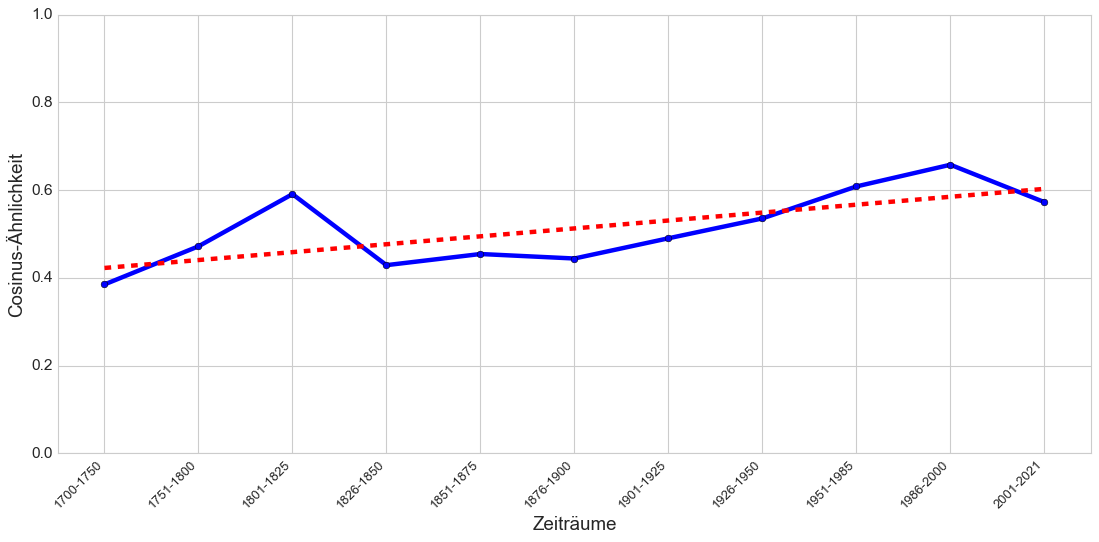

In [69]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')


plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

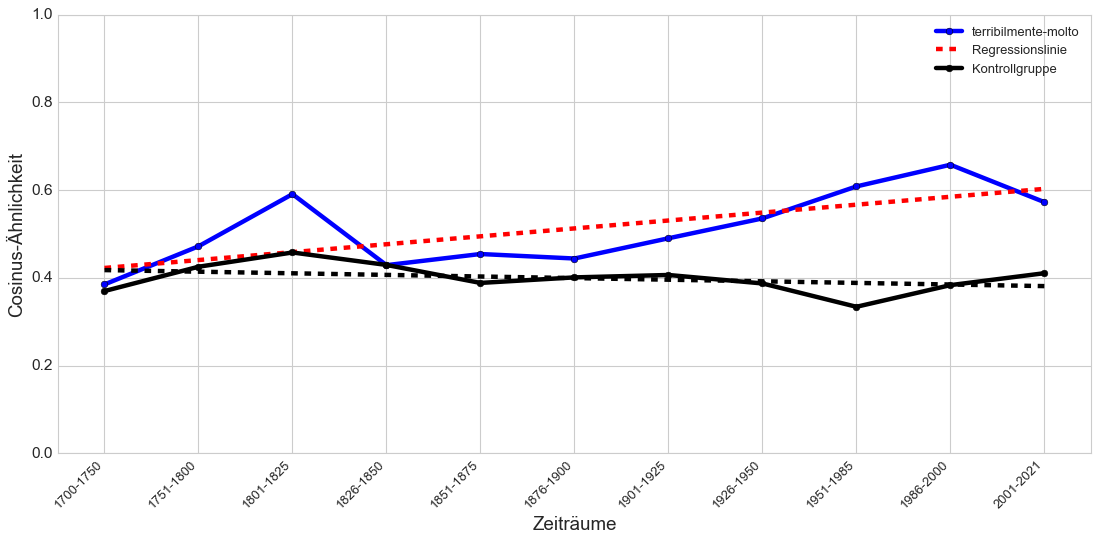

In [70]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [71]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [72]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

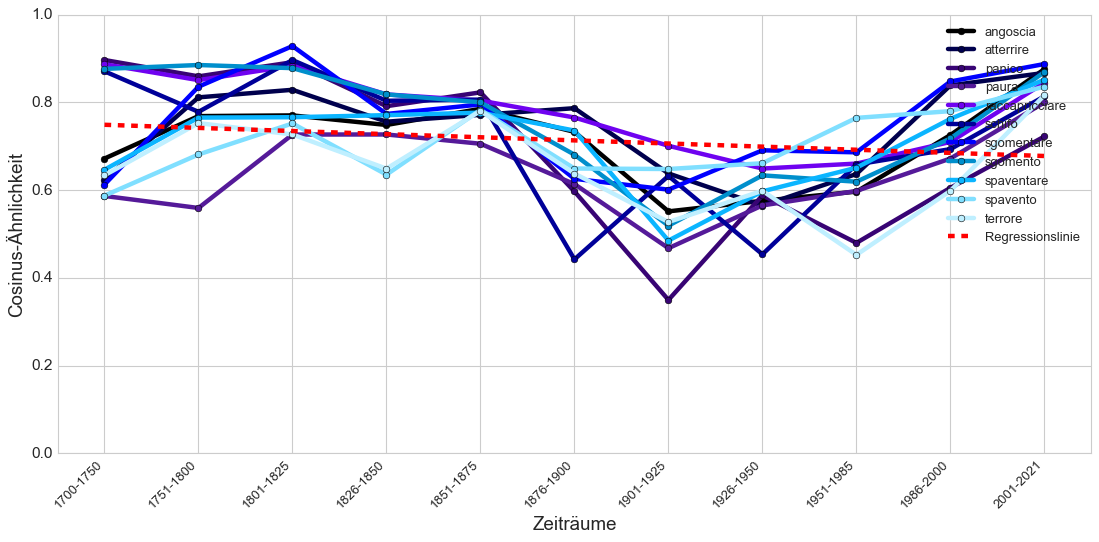

In [73]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

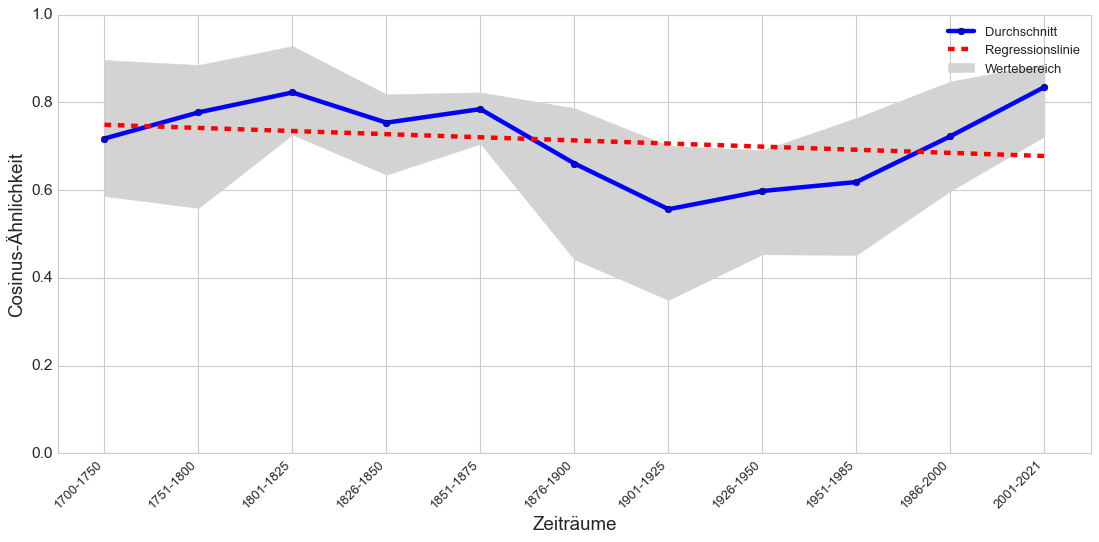

In [74]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [75]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,not in vocab,not in vocab,"(postiglion, 0.9927940368652344)",not in vocab,"(pulsazione, 0.9616905450820923)","(sconvolto, 0.9252853989601135)","(ferocia, 0.935300350189209)","(nausea, 0.9321203827857971)","(consapevolmente, 0.9376463294029236)","(terribilmente, 0.9405544996261597)","(terribilmente, 0.9353802800178528)"
1,not in vocab,not in vocab,"(atten, 0.9918802976608276)",not in vocab,"(rantolo, 0.9580802321434021)","(commiserazione, 0.9212266802787781)","(repulsione, 0.9343674778938293)","(incutere, 0.9235813021659851)","(preferibile, 0.9338992834091187)","(noioso, 0.9194256067276001)","(talmente, 0.9332162737846375)"
2,not in vocab,not in vocab,"(muggisce, 0.9914214015007019)",not in vocab,"(schiantare, 0.9573941230773926)","(implacabile, 0.9202857613563538)","(infondere, 0.9309980869293213)","(rimordere, 0.9152355194091797)","(disquisizione, 0.9332387447357178)","(angosciante, 0.8982499837875366)","(seppure, 0.9253342151641846)"
3,not in vocab,not in vocab,"(scheggiato, 0.9914060831069946)",not in vocab,"(respirazione, 0.957179069519043)","(contrazione, 0.9116946458816528)","(repugnanza, 0.9249370098114014)","(poverina, 0.914202868938446)","(incognita, 0.9327954649925232)","(talmente, 0.8979797959327698)","(angosciante, 0.9195689558982849)"
4,not in vocab,not in vocab,"(profumato, 0.9908615946769714)",not in vocab,"(pesantezza, 0.9538265466690063)","(glaciale, 0.9101932644844055)","(osceno, 0.9246289134025574)","(disgraziata, 0.9132267236709595)","(erroneo, 0.9325395226478577)","(finzione, 0.894879937171936)","(assai, 0.9160259962081909)"
5,not in vocab,not in vocab,"(succiameli, 0.9907009601593018)",not in vocab,"(scapigliato, 0.9501758217811584)","(comprimere, 0.9101404547691345)","(maternità, 0.9230337142944336)","(trepido, 0.9130164980888367)","(liscia, 0.932421863079071)","(apparenza, 0.8942278027534485)","(confondere, 0.9146749377250671)"
6,not in vocab,not in vocab,"(fremé, 0.990627110004425)",not in vocab,"(letargo, 0.9499963521957397)","(effondere, 0.9077745676040649)","(melanconia, 0.9213950037956238)","(attanagliare, 0.9120773673057556)","(filogenesi, 0.9321330189704895)","(banale, 0.8930840492248535)","(talvolta, 0.9134998321533203)"
7,not in vocab,not in vocab,"(lagnella, 0.9905163645744324)",not in vocab,"(puntura, 0.9494880437850952)","(acuire, 0.9059600234031677)","(oppressione, 0.9212539792060852)","(avvilire, 0.9105791449546814)","(cooptazione, 0.9320502877235413)","(grottesco, 0.8915454745292664)","(mostruosamente, 0.9100525379180908)"
8,not in vocab,not in vocab,"(enopide, 0.9903711080551147)",not in vocab,"(inenarrabile, 0.9492098689079285)","(disdegno, 0.9047824740409851)","(irritante, 0.9211696982383728)","(insulto, 0.9101107120513916)","(umanit, 0.9314084649085999)","(incomprensibile, 0.8906338810920715)","(sgradevole, 0.9095640182495117)"
9,not in vocab,not in vocab,"(percuoter, 0.9902896285057068)",not in vocab,"(riardeva, 0.9489016532897949)","(affascinare, 0.9026877880096436)","(sentito, 0.920717716217041)","(intollerabile, 0.9094502925872803)","(invincibilmente, 0.9308112859725952)","(ingenuo, 0.8906282782554626)","(apparenza, 0.9083027243614197)"


In [76]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.42760908603668213,
 '1851-1875': 0.42388734221458435,
 '1876-1900': 0.4330931007862091,
 '1901-1925': 0.5361285209655762,
 '1926-1950': 0.4823904037475586,
 '1951-1985': 0.5574557185173035,
 '1986-2000': 0.6680058836936951,
 '2001-2021': 0.6569768786430359}

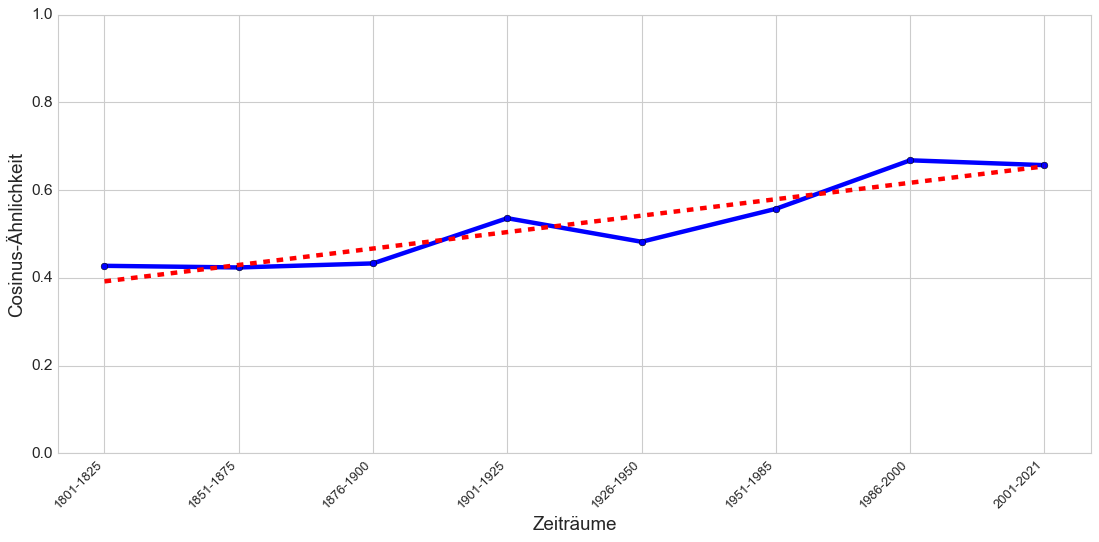

In [77]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [78]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [79]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

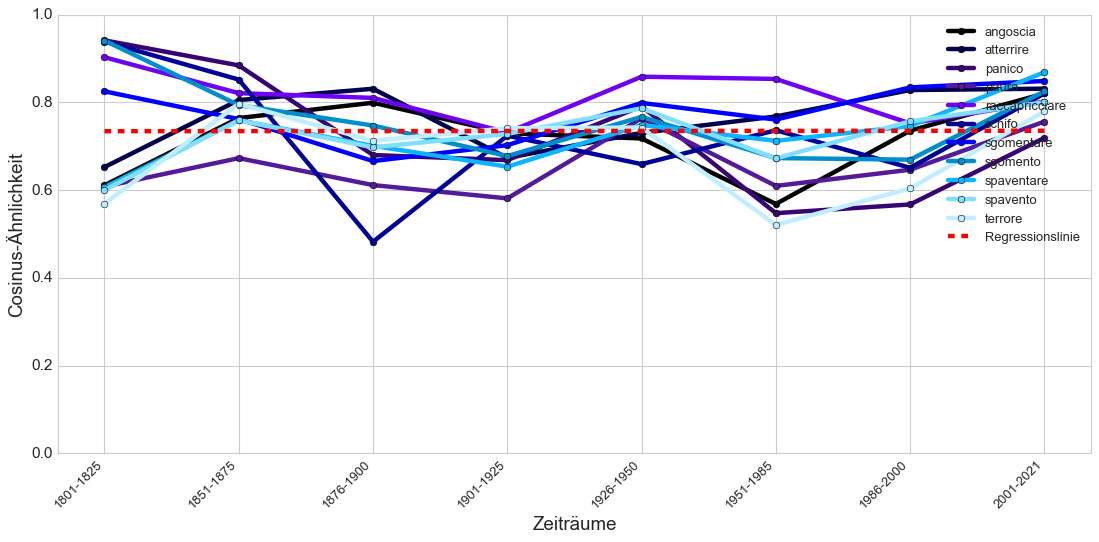

In [80]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

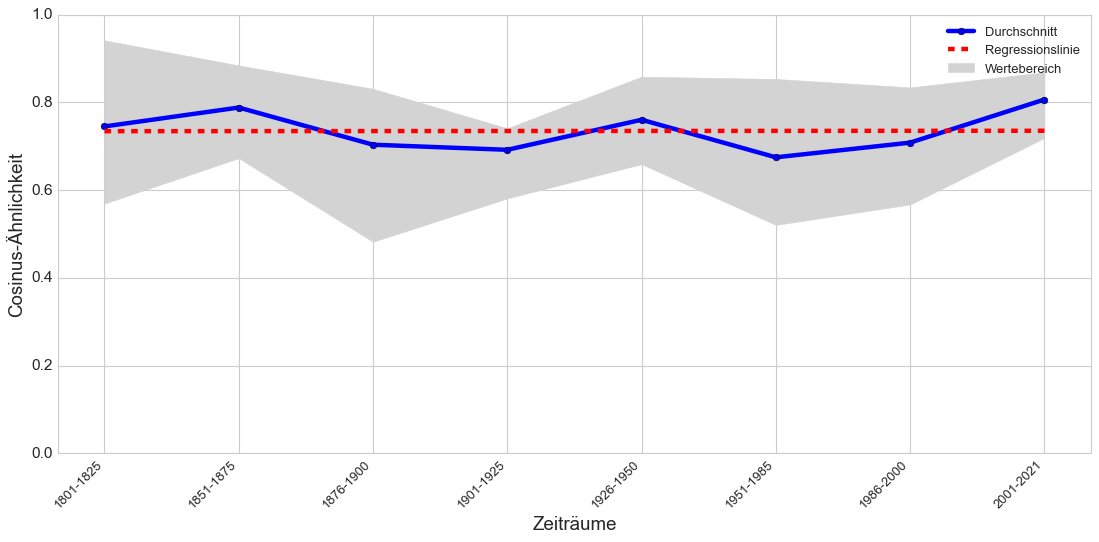

In [81]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()